# WeatherPy
Observation:
1. According to the findings Northern Hemisphere have more cities than Southern Hemisphere more than half of the cities is located under the Northern Hemisphere.
2. Northern Hemisphere - Max Temp vs. Latitude Linear Regression shows a relationship between each other with a linear regression of 1.05x + 47.4 and a r-squared value of 0.7 to conclude that the data is accurate from both angles.
3. Majority of the graphs varaibles that's used don't have adequate information to predict future data.



#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval")
print("-----------------------------")
  
    
#Set list to hold response for
units = "imperial"
city = []
lat = []
lon = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# keep track of record count
process_number = 1
set_count = 1
   

# Weathermap url to retrieve data on cities 
base_url = "http://api.openweathermap.org/data/2.5/weather?" 

# query 
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for cityname in cities:
    

    try:
        
        response = requests.get(query_url + cityname).json()
        city.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f'Processing Record {process_number} of Set {set_count} | {cityname}')
        if process_number > 50:
            process_number = 0
            set_count = set_count + 1
            time.sleep(1) 
        else: 
            process_number = process_number + 1
  
        
        
# Exceptional handling to keep API calls to success   
    except (KeyError):
        print("Skipping city not found.")
        
    
              
print("-----------------------------")                
print(f"Data Retrieval Complete-----")
print("-----------------------------")
             
    
    
    
    
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | lithakia
Processing Record 2 of Set 1 | punta alta
Skipping city not found.
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | olafsvik
Processing Record 8 of Set 1 | beloha
Processing Record 9 of Set 1 | samarai
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | beringovskiy
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | kedrovyy
Processing Record 18 of Set 1 | singkang
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | kailua
Processing Record 21 of Set 1 | guerrero negro
Skipping city not found.
Processing Record 22 of Set 1 | v

Processing Record 33 of Set 4 | esil
Processing Record 34 of Set 4 | luderitz
Processing Record 35 of Set 4 | souillac
Processing Record 36 of Set 4 | yulara
Skipping city not found.
Skipping city not found.
Processing Record 37 of Set 4 | astghadzor
Processing Record 38 of Set 4 | coihaique
Processing Record 39 of Set 4 | lebu
Processing Record 40 of Set 4 | asfi
Processing Record 41 of Set 4 | el alto
Processing Record 42 of Set 4 | raseiniai
Processing Record 43 of Set 4 | oktyabrskiy
Processing Record 44 of Set 4 | leningradskiy
Processing Record 45 of Set 4 | egvekinot
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | fortuna
Skipping city not found.
Processing Record 48 of Set 4 | tarko-sale
Processing Record 49 of Set 4 | iracoubo
Processing Record 50 of Set 4 | clinton
Processing Record 51 of Set 4 | micheweni
Processing Record 0 of Set 5 | maravilha
Processing Record 1 of Set 5 | san ignacio
Processing Record 2 of Set 5 | carnarvon
Processing Record 

Processing Record 14 of Set 8 | bandarbeyla
Processing Record 15 of Set 8 | demba
Processing Record 16 of Set 8 | tazmalt
Processing Record 17 of Set 8 | polunochnoye
Processing Record 18 of Set 8 | mirnyy
Processing Record 19 of Set 8 | tadine
Processing Record 20 of Set 8 | virbalis
Processing Record 21 of Set 8 | sirjan
Processing Record 22 of Set 8 | auki
Processing Record 23 of Set 8 | reyes
Processing Record 24 of Set 8 | klyuchi
Processing Record 25 of Set 8 | punjai puliyampatti
Processing Record 26 of Set 8 | ofunato
Processing Record 27 of Set 8 | murgab
Processing Record 28 of Set 8 | puksoozero
Processing Record 29 of Set 8 | miyako
Skipping city not found.
Processing Record 30 of Set 8 | road town
Processing Record 31 of Set 8 | morondava
Processing Record 32 of Set 8 | ambam
Processing Record 33 of Set 8 | roebourne
Processing Record 34 of Set 8 | salalah
Processing Record 35 of Set 8 | simbahan
Processing Record 36 of Set 8 | ust-omchug
Processing Record 37 of Set 8 | kh

In [8]:
newcities_dict = {
    "City": city,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
datacity = pd.DataFrame(newcities_dict)
datacity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lithakia,37.7167,20.8333,58.42,100,90,17.27,GR,1637910718
1,Punta Alta,-38.8759,-62.0736,61.83,85,2,9.75,AR,1637910719
2,Chokurdakh,70.6333,147.9167,-30.06,100,47,3.38,RU,1637910719
3,Ushuaia,-54.8000,-68.3000,38.86,75,20,8.05,AR,1637910488
4,Port Elizabeth,-33.9180,25.5701,68.09,71,55,27.29,ZA,1637910567
...,...,...,...,...,...,...,...,...,...
482,Nemuro,43.3236,145.5750,36.03,58,69,20.96,JP,1637910929
483,Omboué,-1.5746,9.2618,79.81,84,75,5.03,GA,1637910929
484,Constitución,-35.3333,-72.4167,56.03,69,0,7.52,CL,1637910930
485,Vysokogornyy,50.1167,139.1500,20.21,95,100,5.06,RU,1637910930


In [10]:
datacity.to_csv("output_data.csv", index=False)

In [4]:
city_dict = {
    "City":city,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
city_data = pd.DataFrame(city_dict)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,82.38,70,78,18.16,MV,1637833602
1,Atuona,-9.8000,-139.0333,78.17,77,10,16.87,PF,1637833603
2,Morón,-34.6534,-58.6198,75.96,60,100,3.00,AR,1637833540
3,Severo-Kuril'sk,50.6789,156.1250,34.56,88,73,1.68,RU,1637833604
4,Grindavik,63.8424,-22.4338,41.47,93,90,23.02,IS,1637833604


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data.to_csv("output_data_into.csv", index=False)

In [6]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,5.140000e+02
mean,21.189001,17.638183,53.345953,72.235409,57.256809,7.750856,1.637834e+09
std,33.293077,89.774928,29.390330,22.328075,40.387840,6.004388,8.471564e+01
min,-54.800000,-179.166700,-37.250000,9.000000,0.000000,0.000000,1.637833e+09
25%,-6.862125,-59.651950,36.745000,60.000000,10.000000,3.405000,1.637834e+09
50%,27.109350,24.091700,61.280000,77.500000,74.500000,6.250000,1.637834e+09
75%,47.865650,95.926925,77.205000,90.000000,98.000000,10.865000,1.637834e+09
max,78.218600,179.316700,97.830000,100.000000,100.000000,33.730000,1.637834e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
unique = city_data["Humidity"].unique()
unique


array([ 70,  77,  60,  88,  93,  73,  90,  76,  51,  44,  72,  41,  57,
        39,  30,  79,  92,  94,  23,  53,  91,  58,  74,  80,  45,  71,
        78,  49,  83,  99,  89,  52,  32,  67, 100,  84,  82,  96,  81,
        48,  68,  66,  56,  62,  85,  75,  86,   9,  97,  69,  46,  12,
        34,  29,  54,  38,  98,  95,  33,  87,  20,  65,  42,  24,  61,
        64,  11,  47,  15,  59,  28,  35,  21,  40,  16,  50,  31,  37,
        55,  14,  10,  63,  36,  26,  27,  17], dtype=int64)

In [8]:
#  Get the indices of cities that have humidity over 100%.
cities_humidity = city_data["Humidity"].max()
indices = cities_humidity
indices
# There are not cities that have humidity over 100%

100

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = {
    "City":city,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
   
}
clean_city_data = pd.DataFrame(clean_city_data)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,82.38,70,78,18.16,MV,1637833602
1,Atuona,-9.8000,-139.0333,78.17,77,10,16.87,PF,1637833603
2,Morón,-34.6534,-58.6198,75.96,60,100,3.00,AR,1637833540
3,Severo-Kuril'sk,50.6789,156.1250,34.56,88,73,1.68,RU,1637833604
4,Grindavik,63.8424,-22.4338,41.47,93,90,23.02,IS,1637833604


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

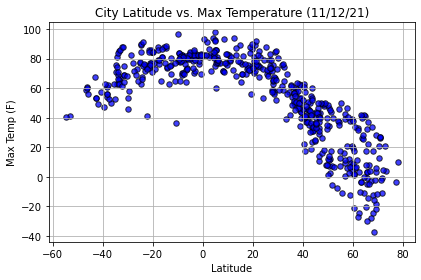

In [10]:
# The maxium x value for chart
# x_limit = 100

# List of values from 0 to 100 each 
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Max Temp"]

# create a title, xlabel and ylabel
plt.title("City Latitude vs. Max Temperature (11/12/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.tight_layout()


# create scatter plot, the size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.savefig("Images/Lat_vs_Temp.png")
plt.show()

In [11]:
print(f"The Max Temp(F) vs Latitude shows that the Latitude and temp meets together at 20")
print(f"The Latitude shows the lowest latitude is 80")
      

The Max Temp(F) vs Latitude shows that the Latitude and temp meets together at 20
The Latitude shows the lowest latitude is 80


## Latitude vs. Humidity Plot

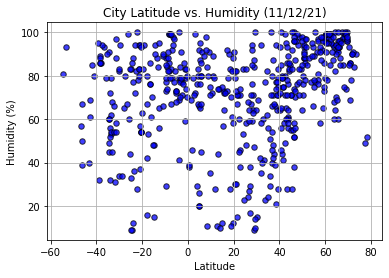

In [12]:
# The maxium x value for chart
# x_limit = 100

# List of values from 0 to 100 each 
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Humidity"]

# create a title, xlabel and ylabel
plt.title("City Latitude vs. Humidity (11/12/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout
# create scatter plot, the size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.savefig("Images/Lat_vs_Humidity.png")
plt.show()

In [13]:
print(f"The Humidity(%) looks to be spread out through the graph amongst all cities mostly above 60% mark")
print(f"The Latitude is also spread out through the graph, it doesn't appear to be a relationship between Humidity and Latitude")

The Humidity(%) looks to be spread out through the graph amongst all cities mostly above 60% mark
The Latitude is also spread out through the graph, it doesn't appear to be a relationship between Humidity and Latitude


## Latitude vs. Cloudiness Plot

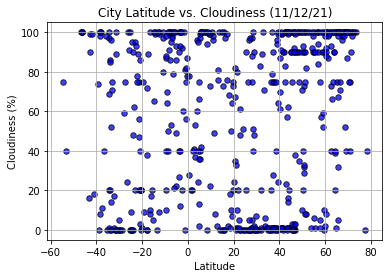

In [14]:
# The maxium x value for chart
x_limit = 100

# List of values from 0 to 100 each 
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Cloudiness"]

# create a title, xlabel and ylabel
plt.title("City Latitude vs. Cloudiness (11/12/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout

# create scatter plot, the size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.savefig("Images/Lat_vs_Cloudiness.png")
plt.show()

In [15]:
print(f"The Cloudiness(%) looks to be spread out through the graph amongst all cities mostly above 80%")
print(f"The Latitude is also spread out through the graph, it doesn't appear to be a relationship between Cloudiness and Latitude, Lat have cluster points around 40%")

The Cloudiness(%) looks to be spread out through the graph amongst all cities mostly above 80%
The Latitude is also spread out through the graph, it doesn't appear to be a relationship between Cloudiness and Latitude, Lat have cluster points around 40%


## Latitude vs. Wind Speed Plot

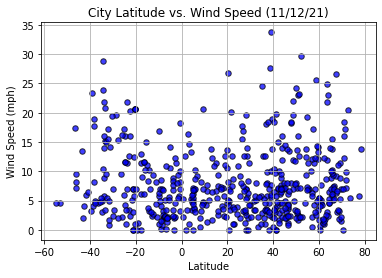

In [16]:
# The maxium x value for chart
x_limit = 100

# List of values from 0 to 100 each 
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Wind Speed"]

# create a title, xlabel and ylabel
plt.title("City Latitude vs. Wind Speed (11/12/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout


# create scatter plot, the size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.savefig("Images/Lat_vs_Wind_Speed.png")
plt.show()

In [17]:
print(f"The Wind Speed (mph) looks below the 20mph amongst all cities")
print(f"The Latitude points are strong with 80%, it doesn't appear to be any relationship between Wind Speed and Latitude")

The Wind Speed (mph) looks below the 20mph amongst all cities
The Latitude points are strong with 80%, it doesn't appear to be any relationship between Wind Speed and Latitude


## Linear Regression

In [18]:
# identify the northern hemisphere and do a count
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] > 0]
northcities_count = len(northern_hemisphere)
northcities_count
print(f"Northern Hemisphere have {northcities_count} total cities out of {len(cities)} cities.")


Northern Hemisphere have 354 total cities out of 556 cities.


In [19]:
# indentify the southern hemisphere and do a count
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
southerncities_count = len(southern_hemisphere)
print(f"Southern Hemisphere have {southerncities_count} total cities out of {len(cities)} cities.")

Southern Hemisphere have 160 total cities out of 556 cities.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7726024976229615


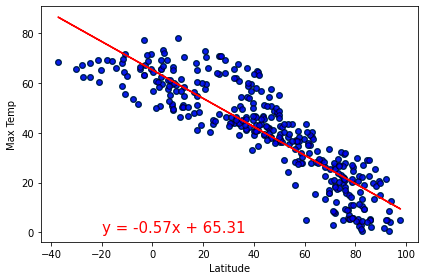

In [20]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Max Temp']
y_values = northern_hemisphere['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,0),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern_Hemisphere_Lat_Linear_Regression_vs_Max_Temp.png")
plt.show()

In [21]:
print(f"The Max Temp appears to have a strong correlation with Latitude amongst the Northern Hemisphere cities")
print(f"The r-value represent an absolute strength of 0.7 which we can conclude this information is 70% accurate.")


The Max Temp appears to have a strong correlation with Latitude amongst the Northern Hemisphere cities
The r-value represent an absolute strength of 0.7 which we can conclude this information is 70% accurate.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3187602608402527


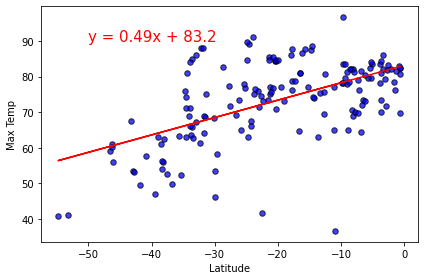

In [22]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout()
plt.savefig("Images/Southern_Hemisphere_Lat_Linear_Regression_vs_Max_Temp.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [23]:
print(f"There is a very weak correlation between Latitude and Max Temp, according to the chart the r-value of 0.37 is weak and this") 
print(f"information is not reliable to predict data. The linear regression have a best fit of y=0.38 also represents the data is not")
print(f"safe to make any conclusions predicated on the variables used")

There is a very weak correlation between Latitude and Max Temp, according to the chart the r-value of 0.37 is weak and this
information is not reliable to predict data. The linear regression have a best fit of y=0.38 also represents the data is not
safe to make any conclusions predicated on the variables used


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18575405892137067


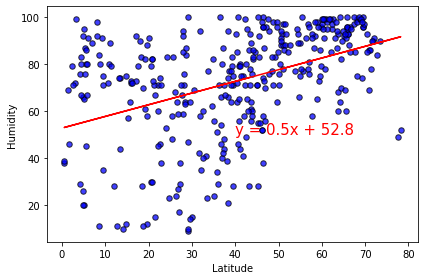

In [24]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.tight_layout()
plt.savefig("Images/Northern_Hemisphere_Lat_Linear_Regression_vs_Humidity.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [25]:
print(f"There is a very weak correlation between Latitude and Humidity.")
print(f"According to the absolute chart the r-value is weak and we can not rely on this graph to predict data from")

There is a very weak correlation between Latitude and Humidity.
According to the absolute chart the r-value is weak and we can not rely on this graph to predict data from


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.046670165250492675


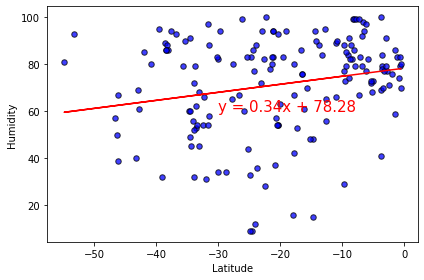

In [26]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.tight_layout()
plt.savefig("Images/Southern_Hemisphere_Lat_Linear_Regression_vs_Humidity.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [27]:
print(f"There is a very weak correlation between Latitude and Humidity")
print(f"According to the absolute chart the r-value of 0.2 is weak and we can not rely on this graph to predict data from")

There is a very weak correlation between Latitude and Humidity
According to the absolute chart the r-value of 0.2 is weak and we can not rely on this graph to predict data from


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06452019107067945


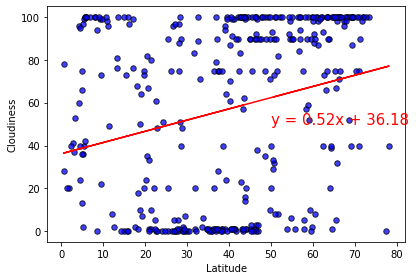

In [28]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,50
                     ),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


plt.tight_layout()

plt.savefig("Images/Norhtern_Hemisphere_Lat_Linear_Regression_vs_Cloudiness.png")


print(f"The r-squared is: {rvalue**2}")
plt.show()

In [29]:
print(f"There is a very weak correlation between Latitude and Cloudiness.")
print(f"According to the absolute chart the r-value 0.05 is weak and we can not rely on this graph to predict data from")

There is a very weak correlation between Latitude and Cloudiness.
According to the absolute chart the r-value 0.05 is weak and we can not rely on this graph to predict data from


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02600490798183995


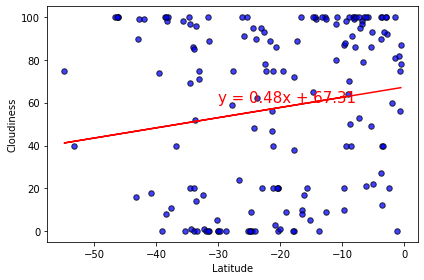

In [30]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.tight_layout()
plt.savefig("Images/Southern_Hemisphere_Lat_Linear_Regression_vs_Cloudiness.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [31]:
print(f"There is a very weak correlation between Latitude and Cloudiness")
print(f"With an r-value of 0.03 this information can not be taking for face value")

There is a very weak correlation between Latitude and Cloudiness
With an r-value of 0.03 this information can not be taking for face value


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01604990097652317


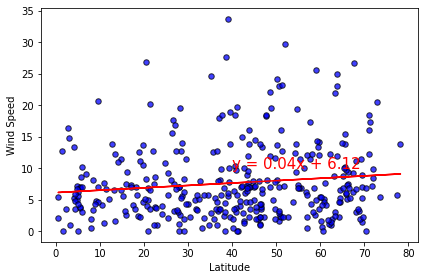

In [32]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.tight_layout()
plt.savefig("Images/Northern_Hemisphere_Lat_Linear_Regression_vs_Wind_Speed.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [33]:
print(f"There is a very weak correlation between Wind Speed vs Latitude.")
print(f"This data is not reliable to predict future data from")

There is a very weak correlation between Wind Speed vs Latitude.
This data is not reliable to predict future data from


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06586980477177638


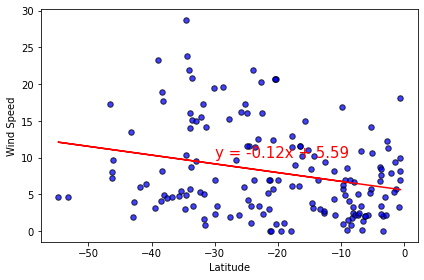

In [34]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 10),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.tight_layout()
plt.savefig("Images/Southern_Hemisphere_Lat_Linear_Regression_vs_Wind_Speed.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [35]:
print(f"There is a very weak correlation between Latitude and Wind Speed. with a r-squared of 0.05 this")
print(f"data is not reliable at all to predict future data from")

There is a very weak correlation between Latitude and Wind Speed. with a r-squared of 0.05 this
data is not reliable at all to predict future data from
